In [16]:
# SONDEWNPN
# Balloon-borne sounding system (BBSS): Vaisala-processed winds, press., temp, &RH
# Data Level: b1
# Site: Houston, TX; Tracking Aerosol Convection interactions ExpeRiment (HOU)
# Facility: Houston, TX; AMF1 (main site for TRACER) (M1)
# Category: Atmospheric Profiling
# Source Instrument/Data: Balloon-Borne Sounding System (sonde)
# Date Range: 2021-09-30 to 2021-11-08

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
data_location='/mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/CodeFiles/Initial_Figures/Figures/Campaign_Data/dropsonde_data/'
count_nc=0
nc_filenames = []
for i, file_name in enumerate(os.listdir(data_location), start=1):
    if file_name.endswith(".cdf"): 
        count_nc+=1
        nc_filenames.append(file_name) 
# print(f'num files: {len(nc_filenames)}') 

date='20220622.17'
print([t for t in nc_filenames if date[:8] in t])
which_file=nc_filenames.index([t for t in nc_filenames if date in t][0])

data=xr.open_dataset(data_location+'/'+nc_filenames[int(which_file)])
var_list= [x for x in data]; 
print(nc_filenames[int(which_file)])

['housondewnpnM1.b1.20220622.173100.cdf', 'housondewnpnM1.b1.20220622.203000.cdf', 'housondewnpnM1.b1.20220622.112900.cdf', 'housondewnpnM1.b1.20220622.233000.cdf', 'housondewnpnM1.b1.20220622.052900.cdf']
housondewnpnM1.b1.20220622.173100.cdf


In [19]:
# #NOT WORKING

# from metpy.calc import lcl, lfc, parcel_profile
# from metpy.units import units

# def clean_sounding(pressure, temperature, dewpoint):
#     import numpy as np
#     pressure = np.array(pressure)
#     temperature = np.array(temperature)
#     dewpoint = np.array(dewpoint)

#     # Sort descending
#     sort_idx = np.argsort(pressure)[::-1]
#     pressure = pressure[sort_idx]
#     temperature = temperature[sort_idx]
#     dewpoint = dewpoint[sort_idx]

#     # Fix duplicates by slight decrement
#     for i in range(1, len(pressure)):
#         if pressure[i] >= pressure[i-1]:
#             pressure[i] = pressure[i-1] - 0.01

#     # Attach units
#     pressure = pressure * units.hPa
#     temperature = temperature * units.degC
#     dewpoint = dewpoint * units.degC

#     return pressure, temperature, dewpoint

# def calculate_lcl_lfc(pressure, temperature, dewpoint):
#     # Use surface values (assumed at index 0)
#     p_surface = pressure[0]
#     T_surface = temperature[0]
#     Td_surface = dewpoint[0]

#     # Calculate LCL
#     lcl_p, lcl_T = lcl(p_surface, T_surface, Td_surface)

#     # Calculate parcel profile
#     parcel_prof = parcel_profile(pressure, T_surface, Td_surface)
#     # parcel_prof=None

#     # Calculate LFC
#     lfc_p, lfc_T = lfc(pressure, temperature, dewpoint, parcel_prof)

#     return lcl_p, lcl_T, lfc_p, lfc_T
# def calculate_cin(pressure, temperature, dewpoint):
#     # Use surface values (assumed at index 0)
#     T_surface = temperature[0]
#     Td_surface = dewpoint[0]

#     # Calculate parcel profile
#     parcel_prof = parcel_profile(pressure, T_surface, Td_surface)

#     # Calculate CIN
#     cape, cin = cape_cin(pressure, temperature, dewpoint, parcel_prof)

#     return cin
# pressure = data['pres'] * units('hPa')
# temperature = data['tdry'] * units('degC')
# dewpoint = data['dp'] * units('degC')
# cin = calculate_cin(pressure,temperature,dewpoint)
# print(f"CIN: {cin}")

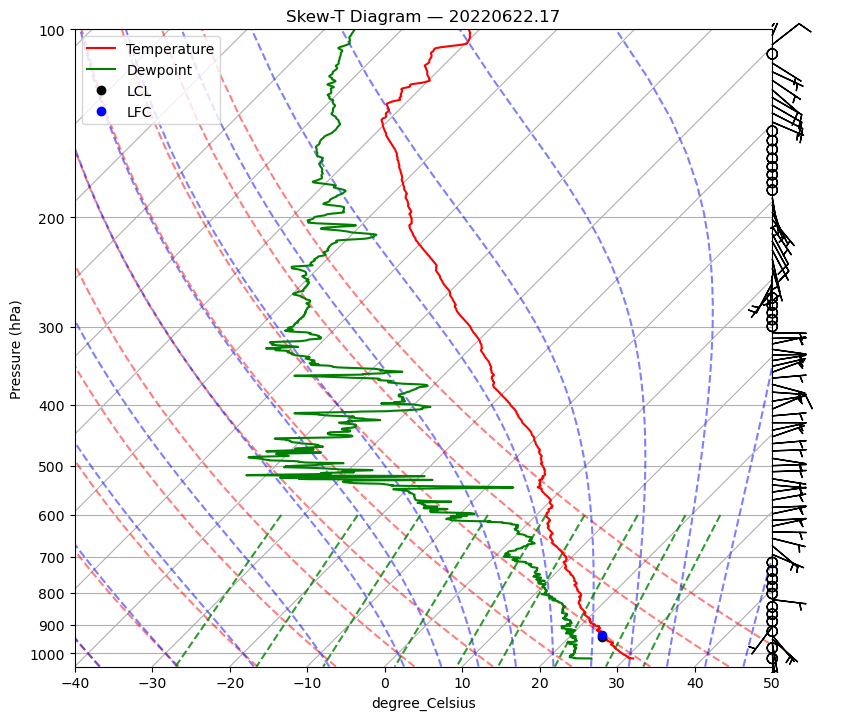

In [20]:
# import matplotlib.pyplot as plt
from datetime import datetime
from metpy.plots import SkewT
from metpy.units import units
from metpy.io import parse_metar_file

# Extract variables from the data
pressure = data['pres'] * units('hPa')
temperature = data['tdry'] * units('degC')
dewpoint = data['dp'] * units('degC')
pressure, temperature, dewpoint = clean_sounding(pressure, temperature, dewpoint)

u_wind = data['u_wind'] * units('m/s') 
v_wind = data['v_wind'] * units('m/s') 
wind_direction = data['deg'] * units('degrees')
relative_humidity = data['rh'] * units('percent')

# Create a new figure
fig = plt.figure(figsize=(9, 9))

# Add a SkewT subplot
skew = SkewT(fig, rotation=45)

# Plot the data on the SkewT plot
skew.plot(pressure, temperature, 'r', label='Temperature')
skew.plot(pressure, dewpoint, 'g', label='Dewpoint')
step=40; skew.plot_barbs(pressure[::step], u_wind[::step], v_wind[::step],y_clip_radius=0.01)

# # Add relative humidity
# ax2 = skew.ax.twiny()
# ax2.plot(relative_humidity, pressure,'b', label='Relative Humidity')
# ax2.set_ylabel('Pressure (hPa)')

#LCL Calculation
lcl_p, lcl_T, lfc_p, lfc_T = calculate_lcl_lfc(pressure, temperature, dewpoint) #*#*
skew.plot(lcl_p, lcl_T, 'ko', markerfacecolor='black', label='LCL') #*#*
skew.plot(lfc_p, lfc_T, 'bo', markerfacecolor='blue', label='LFC') #*#*

# Add legend and title
plt.legend(loc='upper left')
plt.title(f'Skew-T Diagram \u2014 {date}')
plt.ylabel('Pressure (hPa)')
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()



# plt.savefig(os.path.join("skewt/", f"{date}.jpg"),dpi=72)

original wind magnitude [  4.          1.21        1.2100002 ... 176.89001   176.89
 179.56     ]
rotated wind magnitude [  4.00000022   1.2100001    1.21000017 ... 176.89000279 176.88999449
 179.55999699]


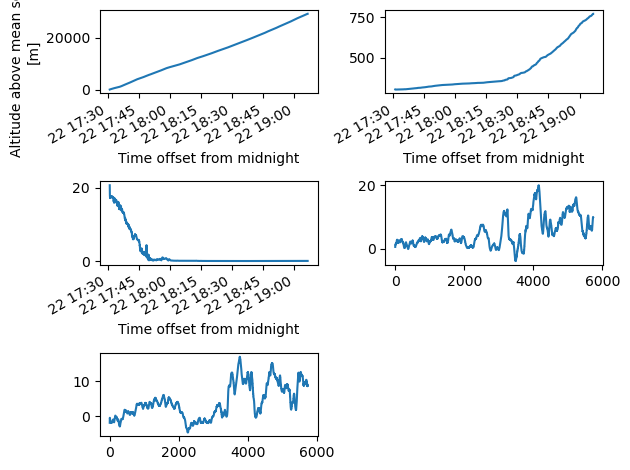

In [21]:
plt.subplot(3,2,1)
alt=data[var_list[int(var_list.index('alt'))]] 
alt.plot()

plt.subplot(3,2,2)
tdry=data[var_list[int(var_list.index('tdry'))]] 
pres=data[var_list[int(var_list.index('pres'))]] 
tdry=tdry+273.15 #convert to Kelvin
pot_temp=tdry*(1000/pres)**(0.2854) #convert to potential tmperature
pot_temp.plot()
pot_temp

plt.subplot(3,2,3)
RH=data[var_list[int(var_list.index('rh'))]]/100
#Calculation for Mixing Ratio
#Kerry Emanuel 1994
Rd=287
Rv=461
eps= Rd/Rv
e_star = np.exp(53.67957-(6743.769/tdry)-4.8451*np.log(tdry))
e = RH*e_star
# spec_humid = (eps*e)/((pres*100)-e*(1-eps))
mix_ratio = (eps*e)*1000/(pres-e)
mix_ratio.plot()

#winds
u_wind=data[var_list[int(var_list.index('u_wind'))]] 
v_wind=data[var_list[int(var_list.index('v_wind'))]]
print(f'original wind magnitude {u_wind.values**2+v_wind.values**2}')
#rotate winds to match coastline orientation
def rotation(theta):
    rotation_mat=np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
    return rotation_mat

#picks out each index of u and v 
theta=-(45+90)
rotation_mat=rotation(np.radians(theta))
uv_vec=np.vstack([u_wind, v_wind]); uv_vec=np.dot(rotation_mat,uv_vec)
u_wind=uv_vec[0];v_wind=uv_vec[1]
print(f'rotated wind magnitude {u_wind**2+v_wind**2}')

plt.subplot(3,2,4)
plt.plot(u_wind)
plt.subplot(3,2,5)
plt.plot(v_wind)

plt.tight_layout()

In [15]:
#MAKING SOUNDING FILE

def MakeSoundingFile():
    file_path = 'input_sounding.txt'
    
    # Open the file in write mode
    with open(file_path, 'w') as file:
        
        #this needs to be fixed to start at the correct value ***
        line = "{:>9.4f} {:>10.4f} {:>10.4f}\n".format(pres.values[0],pot_temp.values[0],mix_ratio.values[0])
        file.write(line)
            
        for i in range(0,len(alt)):
            var1=np.round(alt.values[i],4)
            var2=np.round(pot_temp.values[i],4)
            var3=np.round(mix_ratio.values[i],4)
            var4=np.round(u_wind[i],4);
            var5=np.round(v_wind[i],4);
    
            #zero velocity case #comment if not using
            # var4=0
            # var5=0
            
            line = "{:>9.4f} {:>10.4f} {:>10.4f} {:>10.4f} {:>10.4f}\n".format(var1, var2, var3, var4, var5)
            file.write(line)
MakeSoundingFile()